In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print("Heart Disease Dataset")
heart_df = pd.read_csv('./data/heart-statlog/data/heart-statlog_csv.csv')
print("COLUMNS", heart_df.columns)
print("SIZE",heart_df.size)
print(heart_df.describe)


Heart Disease Dataset
COLUMNS Index(['age', 'sex', 'chest', 'resting_blood_pressure', 'serum_cholestoral',
       'fasting_blood_sugar', 'resting_electrocardiographic_results',
       'maximum_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak',
       'slope', 'number_of_major_vessels', 'thal', 'class'],
      dtype='object')
SIZE 3780
<bound method NDFrame.describe of      age  sex  chest  resting_blood_pressure  serum_cholestoral  \
0     70    1      4                     130                322   
1     67    0      3                     115                564   
2     57    1      2                     124                261   
3     64    1      4                     128                263   
4     74    0      2                     120                269   
..   ...  ...    ...                     ...                ...   
265   52    1      3                     172                199   
266   44    1      2                     120                263   
267   56    0    

In [92]:
heart_df.dtypes

age                                       int64
sex                                       int64
chest                                     int64
resting_blood_pressure                    int64
serum_cholestoral                         int64
fasting_blood_sugar                       int64
resting_electrocardiographic_results      int64
maximum_heart_rate_achieved               int64
exercise_induced_angina                   int64
oldpeak                                 float64
slope                                     int64
number_of_major_vessels                   int64
thal                                      int64
class                                    object
dtype: object

In [93]:
# There is no missing data in heart dataset, where 0 means no missing data
heart_df.isna().sum()

age                                     0
sex                                     0
chest                                   0
resting_blood_pressure                  0
serum_cholestoral                       0
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
maximum_heart_rate_achieved             0
exercise_induced_angina                 0
oldpeak                                 0
slope                                   0
number_of_major_vessels                 0
thal                                    0
class                                   0
dtype: int64

In [94]:
print("Min age: {}".format(heart_df['age'].min()))
print("Max age: {}".format(heart_df['age'].max()))

Min age: 29
Max age: 77


# Data visualization

## Bar plots

Text(0, 0.5, 'Count')

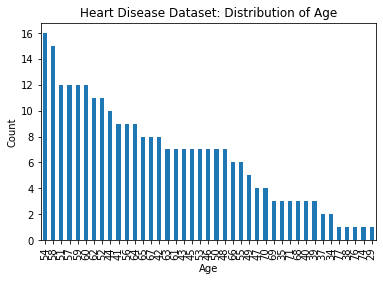

In [95]:
heart_df['age'].value_counts().plot(
    kind='bar',
    title='Heart Disease Dataset: Distribution of Age'
)
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

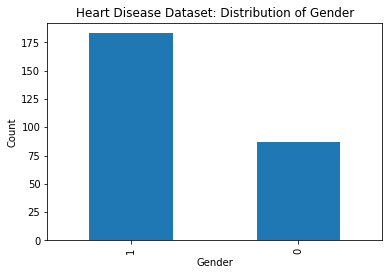

In [96]:
heart_df['sex'].value_counts().plot(
    kind='bar',
    title='Heart Disease Dataset: Distribution of Gender'
)
plt.xlabel('Gender')
plt.ylabel('Count')

In [97]:
print("Cervical Cancer Dataset")
cervical_df = pd.read_csv('./data/cervical-cancer/data/cervical-cancer_csv.csv')
print("COLUMNS", cervical_df.columns)
print("SIZE",cervical_df.size)
print(cervical_df.describe)

Cervical Cancer Dataset
COLUMNS Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')
SIZE 30060
<bound method NDFrame.describe of      Age  Number of sexual partners  First sexual intercourse  \
0     18                       

In [98]:
# There's a lot of missing data in cervical dataset, where 0 means no missing data
cervical_df.isna().sum()

Age                                     0
Number of sexual partners              25
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               103
Hormonal Contraceptives (years)       103
IUD                                   112
IUD (years)                           112
STDs                                  100
STDs (number)                         100
STDs:condylomatosis                   100
STDs:cervical condylomatosis          100
STDs:vaginal condylomatosis           100
STDs:vulvo-perineal condylomatosis    100
STDs:syphilis                         100
STDs:pelvic inflammatory disease      100
STDs:genital herpes                   100
STDs:molluscum contagiosum            100
STDs:AIDS                             100
STDs:HIV                              100
STDs:Hepatitis B                  

Text(0, 0.5, 'Count')

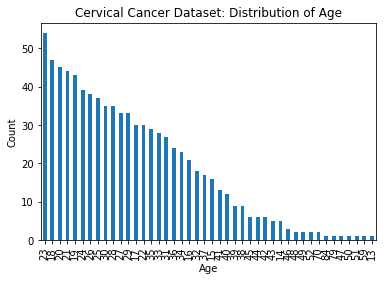

In [99]:
cervical_df['Age'].value_counts().plot(
    kind='bar',
    title='Cervical Cancer Dataset: Distribution of Age'
)
plt.xlabel('Age')
plt.ylabel('Count')
